In [1]:
%config InlineBackend.figure_format = 'svg'
%reload_ext autoreload
%autoreload 2
%reload_ext blackcellmagic

In [52]:
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import sys
sys.path.append("../..")

from kutils import load_ml1m, Dataset, load_ml100k
from bpr import bpr
from tqdm.auto import tqdm
from sklearn.metrics import silhouette_samples, silhouette_score

In [64]:
type(kmeans.labels_)

numpy.ndarray

In [6]:
%time df = load_ml100k('~/datasets/ml-100k/u.data')

CPU times: user 26 ms, sys: 5.98 ms, total: 32 ms
Wall time: 31.5 ms


In [7]:
%time data = Dataset(df)

CPU times: user 342 ms, sys: 28.8 ms, total: 371 ms
Wall time: 370 ms


In [9]:
# cluster users
rstate = np.random.RandomState(42)

In [53]:
n_clusters = 9
train_matrix = data.train_matrix

kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=rstate).fit(train_matrix)

# update n_clusters to reflect number of non-empty clusters
n_clusters = len(np.unique(kmeans.labels_))
max_cluster_size = max(np.bincount(kmeans.labels_))

matrix = np.full(
    shape=[n_clusters, max_cluster_size], fill_value=-1, dtype=np.int32
)

for cluster in range(n_clusters):
    users = np.argwhere(kmeans.labels_ == cluster).reshape(-1)
    n_users = users.shape[0]
    matrix[cluster, np.arange(n_users)] = users

In [56]:
intertias, silhouettes = {}, {}
min_clusters, max_clusters = 5, 80
num_clusters = max_clusters - min_clusters
with tqdm(total=num_clusters) as progress:
    for n_clusters in range(num_clusters):
        if n_clusters < 2:
            continue
        kmeans = KMeans(n_clusters=n_clusters, random_state=rstate).fit(train_matrix)
        intertias[n_clusters] = kmeans.inertia_
        silhouette_avg = silhouette_score(train_matrix, kmeans.labels_)
        silhouettes[n_clusters] = silhouette_avg
        progress.update()

  0%|          | 0/75 [00:00<?, ?it/s]

Text(0.5, 1.0, 'ML-100K')

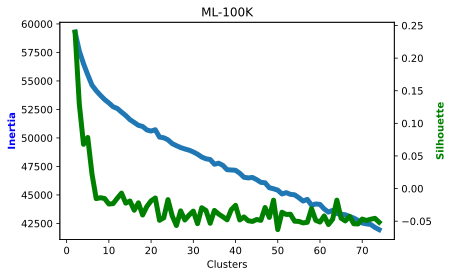

In [61]:
sns.lineplot(x=list(intertias.keys()), y=list(intertias.values()), lw=5)
ax = plt.gca()
ax1 = ax.twinx()
sns.lineplot(
    x=list(silhouettes.keys()),
    y=list(silhouettes.values()),
    ax=ax1,
    lw=5,
    color="green",
)
ax1.set_ylabel("Silhouette", color="green", fontweight="bold")
ax.set_ylabel("Inertia", color="blue", fontweight="bold")
ax.set_xlabel("Clusters");
ax.set_title('ML-100K')